# สร้างข้อมูล sounding จาก ERA5 เพื่อคำนวณดัชนี instability indices 
* เนื่องจากวันที่เกิดเหตุการณ์พายุลูกเห็บที่เชียงของ ไม่มีข้อมูลตรวจอกาาศช้นบน จากสถานีเชียงใหม่ จึงต้องใช้ข้อมูลจากแบบจำลอง era 5 hourly โดยดูวิธีการและโค้ดจาก https://www.youtube.com/watch?v=C3YwOG8btMk เพื่อที่จะนำไปพลอตใน sharppy
* เชียงรายไม่มีการตรวจวัดสภาพอากาศชั้นบน มีแต่เชียงใหม่ แต่ก็ไม่ได้มีทุกวัน ให้ดูรายชื่อรหัสสถานีตรวจอากาศจากรายงาน wmo ได้ที่ลิงก์  https://library.wmo.int/doc_num.php?explnum_id=9896
* พิกัดภูมิศาสตร์ใช้บริเวณหาดไคร้ ต.เวียง อ.เชียงของ จังหวัดเชียงราย ได้มาจากกุเกิ้ล https://www.google.com/maps/place/Chiang+Khong+District,+Chiang+Rai/@20.2561247,100.4107162,2644m/data=!3m1!1e3!4m5!3m4!1s0x30d6372562c471b5:0x30346c5fa8a7370!8m2!3d20.1651266!4d100.3947116
* ลงโปรแกรม sharppy binary https://github.com/skovic/SHARPpy/releases/tag/v1.4.0-fixed
* ข้อมูล ERA5 hourly https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-pressure-levels?tab=overview


## ดาวน์โหลดข้อมูล era5 hourly วันที่ 20-23/04/2020 เวลา 1100UTC
* เนื่องจากอยากวิเคราะห์เวลา 1800 Local time เมื่อ - 7UTC เท่ากับ 1100 เท่ากับวันที่ 23 เมษายน 2020 เวลา 11 UTC
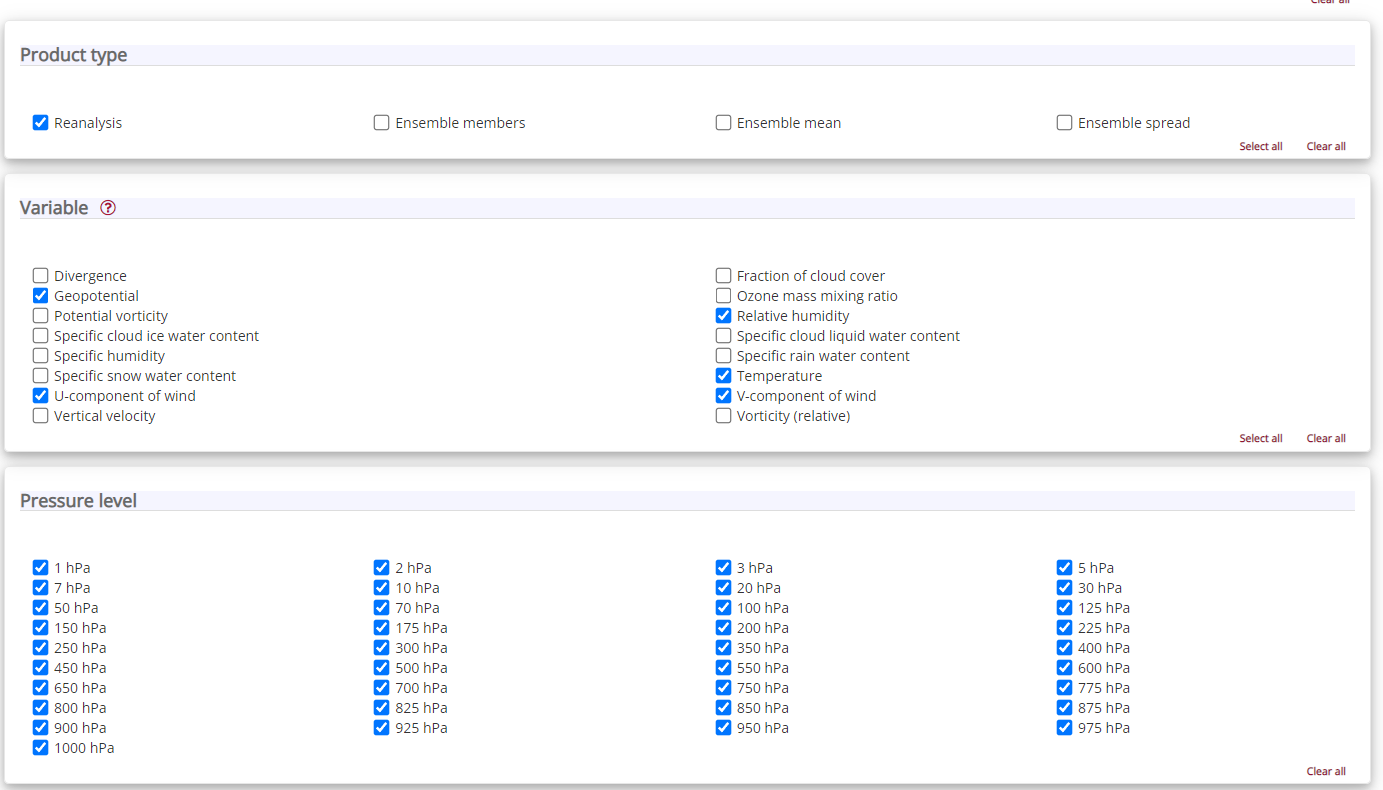

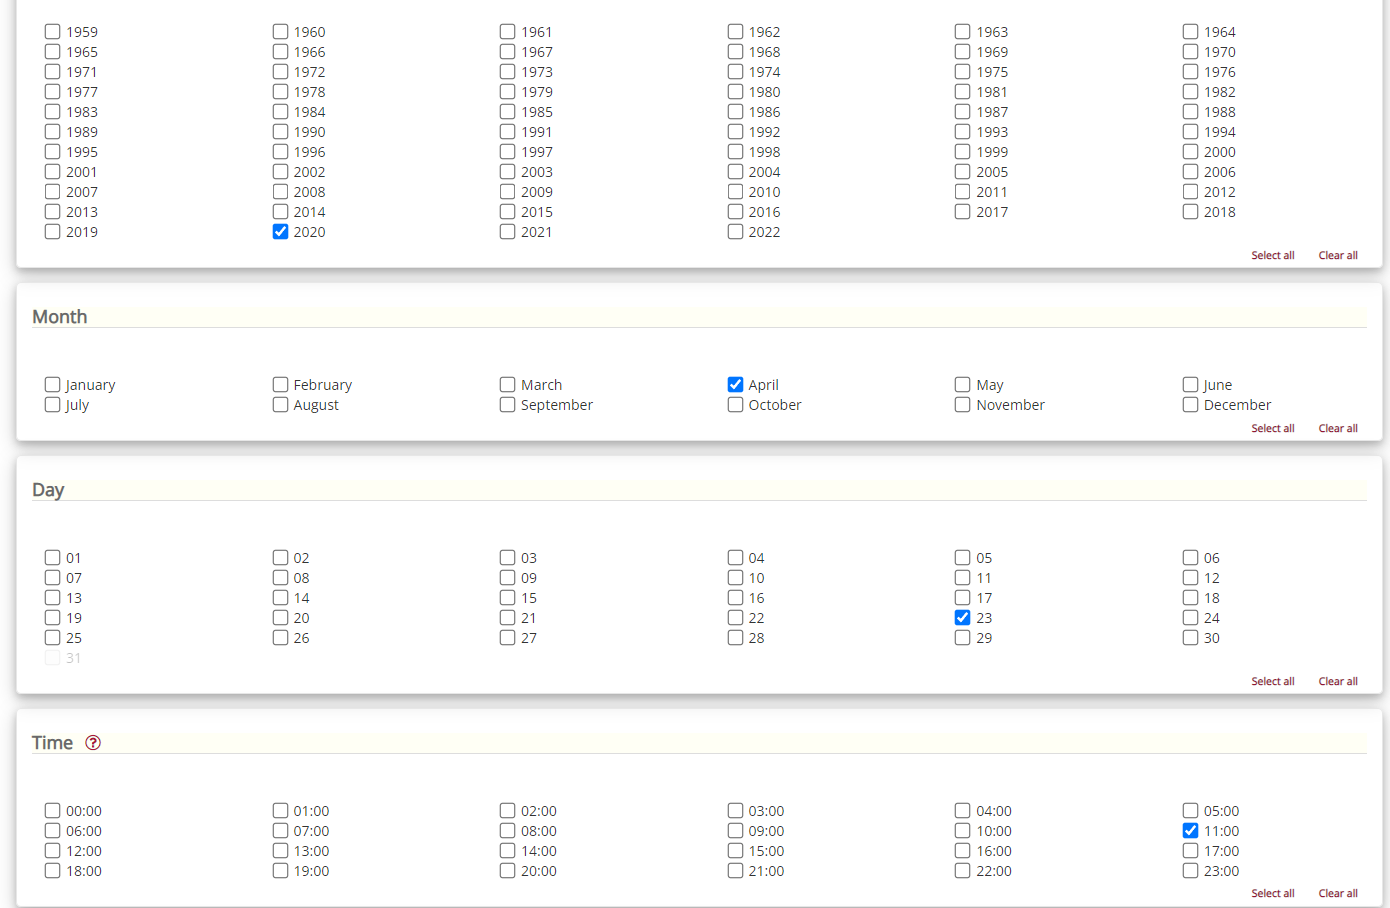

* ใช้ค่าพิกัดต.เวียง อ.เชียงของ จ.เชียงราย  ที่ได้จากกุเกิ้ล
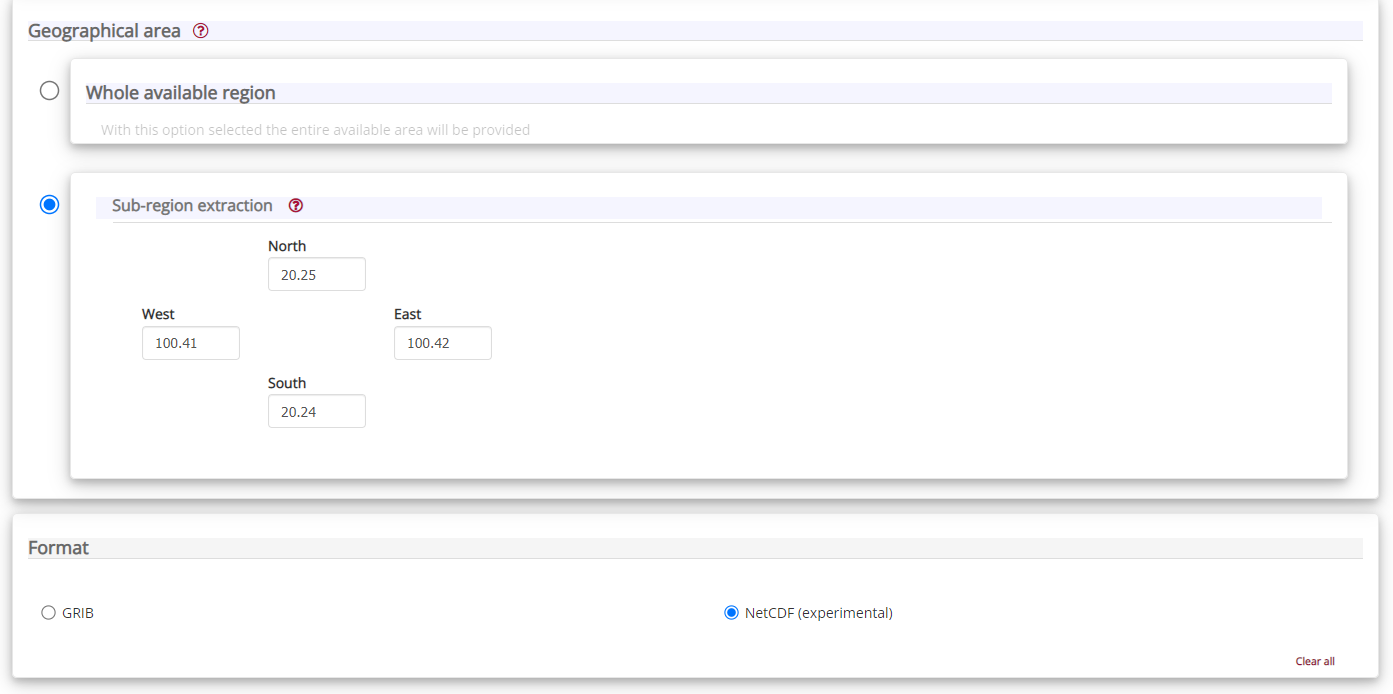


## โค้ดสกัดค่า reanalysis ตามพิกัดที่ต้องการ

In [1]:
from netCDF4 import Dataset
from metpy import calc
from metpy.units import units
import numpy as np

In [2]:
from metpy.calc import equivalent_potential_temperature

# ต้องการคำนวณค่า 3 คอลัมน์สุดท้าย เพื่อให้ได้ตามฟอร์แมท wyoming
ตามลิงก์นี้ https://weather.uwyo.edu/upperair/columns.html
* THTA:	Potential Temperature	[kelvin]
* THTE:	Equivalent Potential Temperature	[kelvin]
* THTV:	Virtual Potential Temperature	[kelvin]

แต่ยังมีค่าที่เรายังไม่มีอีก ต้องหาทางคำนวณ หรือ ดาวน์โหลดค่ามา
* FRPT:	Frost Point Temperature	[celsius]
* RELI:	Relative Humidity with respect to Ice	[%]
* MIXR:	Mixing Ratio	[gram/kilogram]

## อ่านค่าแบบจำลองที่สกัดมาได้

In [3]:
ds = Dataset('./0data/1data_reanalysis/era5_11utc_20_23apr_2020_nearChiangkhong.nc')
lat = ds['latitude'][:]
lon = ds['longitude'][:]

## หาตำแหน่งที่ใกล้กับตำแหน่งที่ต้องการของหาดไคร้

In [4]:
c_x, c_y = 20.255734, 100.410341
x, y = np.abs(lat - c_x).argmin(), np.abs(lon + c_y).argmin()

## คำนวณค่าตัวแปรอุตุ

In [5]:
date=3 #0=20, 1=21, 2=22, 3=23 apr
levels = ds['level'][:]
z = ds['z'][date, :, y, x] / 9.81
u = ds['u'][date, :, y, x]
v = ds['v'][date, :, y, x]
temp = ds['t'][date, :, y, x] - 273.15
rh = ds['r'][date, :, y, x]

## 	Dewpoint Temperature

In [6]:
DWPT = np.asarray(calc.dewpoint_from_relative_humidity(np.asarray(temp) * units.degC, np.asarray(rh) * units.percent))
DWPT

array([-106.56550817, -106.31318992, -108.62831756,  -98.33618807,
        -97.14982498,  -95.25951791,  -91.27159063,  -88.77520293,
        -86.09353701,  -83.86585623,  -80.5503602 ,  -76.72794043,
        -72.40170075,  -67.17206963,  -63.22028054,  -58.74108666,
        -53.21793718,  -46.63415615,  -34.65806886,  -23.87416219,
        -18.56087989,  -13.18234445,   -8.01268923,   -1.93743432,
          1.9718136 ,    4.64840939,    6.71222373,    7.71663585,
          8.69377417,    9.57180578,   10.26512015,   10.64893296,
         11.61892669,   12.30214733,   20.50763231,   22.02926458,
         23.38467831])

## Wind Direction

In [7]:
DRCT = np.degrees(np.arctan2(u ,v)) + 180
DRCT

masked_array(data=[205.18843746325294, 273.3222183715012,
                   214.7347066287654, 106.07078457877365,
                   77.6318230440283, 90.95803041671456,
                   107.02760778975998, 97.81467431928974,
                   258.79819046557066, 272.3909754092088,
                   258.11235838330106, 265.25365125778706,
                   253.91153660717168, 245.9931309931307,
                   238.8878890046763, 240.09876058150573,
                   245.1580597977407, 260.49109216426007,
                   258.95431122775176, 258.4640899155284,
                   260.63883593867433, 261.99574917809537,
                   264.55411935265334, 259.8278687472386,
                   251.9511584269309, 238.98854455765073,
                   217.61224583405195, 205.53298333520803,
                   196.97348281071478, 188.9491740169038,
                   184.11355565210818, 182.79409910858183,
                   178.70686790073623, 160.2689319858572,
            

## Wind Speed

In [8]:
wspd = np.hypot(u, v) * 1.944
wspd #หน่วยยังเป็น m/s  อ่านเอกสารของ ERA5 ที่ https://apps.ecmwf.int/codes/grib/param-db/?id=131


masked_array(data=[10.41165754, 30.00371474, 34.24857407,  6.62991822,
                    1.02246395, 18.58889289, 15.72455726, 13.67360398,
                    0.91195077, 11.19902597, 48.2401324 , 60.80598968,
                   55.47287179, 60.18122506, 64.48516754, 60.61114478,
                   47.96875023, 38.94470234, 45.52841337, 39.32686791,
                   39.39528352, 36.92808104, 33.92338472, 30.9000323 ,
                   27.87355353, 22.40593848, 17.65872008, 16.10132869,
                   15.0997032 , 14.52136155, 14.22372023, 13.42980603,
                   11.27360257,  6.95669963,  1.97387039,  1.80602014,
                    1.80202279],
             mask=False,
       fill_value=1e+20)

### แปลง หน่วยจาก m/s ไปเป็น knot ตามฟอร์แมทของ wyoming https://weather.uwyo.edu/upperair/columns.html

In [9]:
SKNT = (np.asarray(wspd) * units('m/s')).to(units.knot)
SKNT = np.asarray(SKNT) 

# Relative Humidity

In [10]:
RELH = np.asarray(rh) * units.percent
RELH = np.asarray(RELH) 
RELH

array([1.98874332e-04, 1.98874332e-04, 1.98874332e-04, 8.12521599e-03,
       2.55631676e-02, 3.98305826e-02, 1.66652049e-01, 9.87821045e-01,
       3.12000695e+00, 3.15502092e+01, 5.74423969e+01, 4.01962627e+01,
       3.53754617e+01, 2.94735077e+01, 2.63378469e+01, 2.80546926e+01,
       3.20416424e+01, 2.48619621e+01, 3.68006179e+01, 5.68685298e+01,
       5.78450551e+01, 6.07667046e+01, 6.60044312e+01, 7.92097164e+01,
       7.34266575e+01, 6.45998834e+01, 5.51374167e+01, 5.07002507e+01,
       4.63027163e+01, 4.20637088e+01, 3.77628758e+01, 3.31846209e+01,
       3.10207296e+01, 2.91992563e+01, 4.55544697e+01, 4.56781206e+01,
       4.56892175e+01])

# ข้อสังเกต ความชื้นสัมพัทธ์ ต่ำมาก ๆ 

# Potential Temperature
คำนวณจากวิธี https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.potential_temperature.html#examples-using-metpy-calc-potential-temperature

In [11]:
# แปลงหน่วยอุณหภูมิเพื่อคำนวณค่า PT
T_k = ((np.asarray(temp)) + 273.15) * units.kelvin

In [12]:
THTA = calc.potential_temperature(np.asarray(levels) * units.hPa, np.asarray(T_k) *  units.kelvin) 
THTA = np.asarray(THTA) 

# Equivalent Potential Temperature
ใช้วิธีในการคำนวณจาก https://unidata.github.io/MetPy/dev/examples/calculations/Equivalent_Potential_Temperature.html

In [13]:
THTE = calc.equivalent_potential_temperature(np.asarray(levels) * units.hPa, np.asarray(temp) * units.degC, np.asarray(DWPT) * units.degC)
THTE = np.asarray(THTE) 

# Virtual Potential Temperature
* คำนวณค่า mixing ratio ก่อน ด้วยการใช้ pressure, temperature และ relative humidity จากลิงก์ https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.mixing_ratio_from_relative_humidity.html
* คำนวณค่า Virtual Potential Temperature จากลิงก์ https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.virtual_potential_temperature.html

## หา mixing ratio

In [14]:
MIXR = calc.mixing_ratio_from_relative_humidity(np.asarray(levels) * units.hPa, np.asarray(temp) * units.degC, np.asarray(rh) * units.percent) * units('g/kg')
MIXR = np.asarray(MIXR) *1000.0 # เอา 1000 ไปคูณจะกลายเป็นหน่วยกรัม

## หา Virtual Potential Temperature

In [15]:
THTV = calc.virtual_potential_temperature(np.asarray(levels) * units.hPa, np.asarray(temp) * units.degC, np.asarray(MIXR)  * units('g/kg'))
THTV = np.asarray(THTV)

## บันทึกข้อมูล sounding ให้อยู่ในฟอร์แมทของ wyomming

In [16]:
with open('./0output/era5_23042020_1100utc_wyoming.txt', 'w', encoding = 'utf-8') as f:
    f.write(f"48303 VTCC Chiang Rai ERA5 Simulated at 11z 21 Apr 2020\n\n")
    f.write(f"-----------------------------------------------------------------------------\n")
    f.write(f"   PRES   HGHT   TEMP   DWPT   RELH   MIXR   DRCT   SKNT   THTA   THTE   THTV\n")
    f.write(f"    hPa     m      C      C      %    g/kg    deg   knot     K      K      K \n")
    f.write(f"-----------------------------------------------------------------------------\n")
    

    for i in reversed(range(len(levels))):
        f.write(f"{levels[i]:>7.1f}{z[i]:>7.0f}{temp[i]:7.2f}{DWPT[i]:7.2f}{rh[i]:7.0f}{MIXR[i]:7.2f}{DRCT[i]:7.0f}{SKNT[i]:7.0f}{THTA[i]:7.1f}{THTE[i]:7.1f}{THTV[i]:7.1f}\n") #ok
        #f.write("%.1f\n" %levels[i]) #ok
        #f.write(f"{levels[i]:.1f}\t{z[i]:5.1f}\t{temp[i]:3.1f}\t{DWPT[i]:3.1f}\t{rh[i]:3.1f}\t{MIXR[i]:3.4f}\t{DRCT[i]:3.1f}\t{SKNT[i]:3.1f}\t{THTA[i]:4.1f}\t{THTE[i]:4.1f}\t{THTV[i]:4.1f}\t\n")

    f.write('Station information and sounding indices')
    

# ผลที่ได้

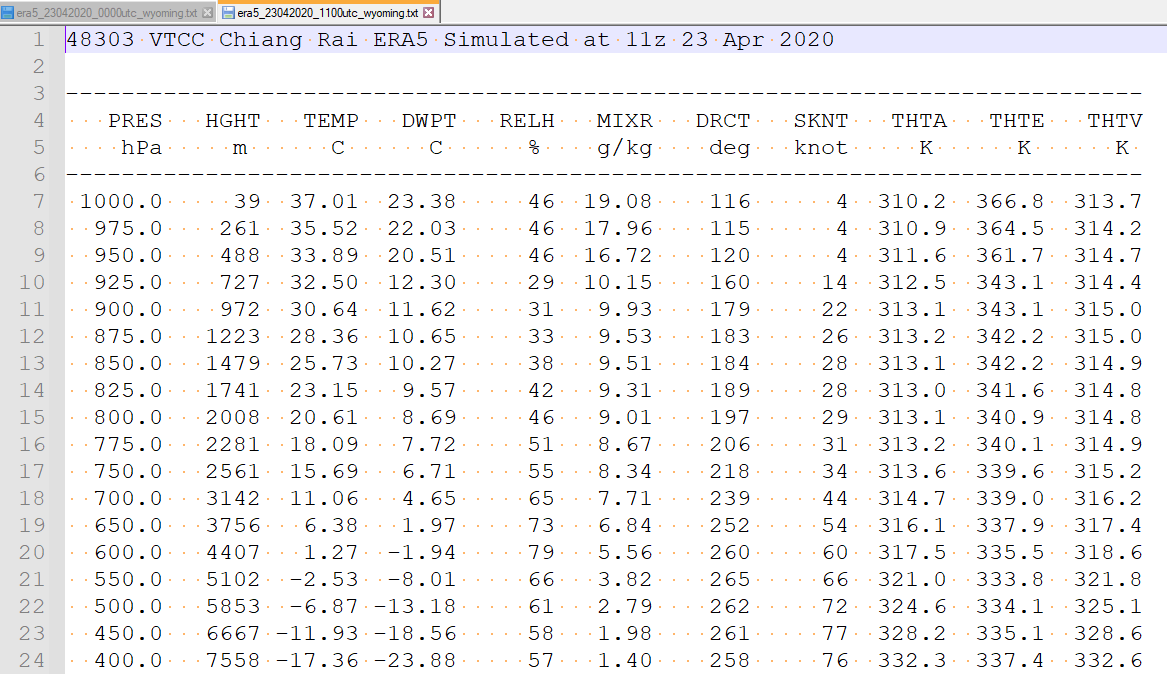